In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
# add preprocessing layer to the front of resnet
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 17s 0us/step


In [4]:
new_train_path = './sample_6/train/'
new_val_path = './sample_6/validation/'
new_test_path = './sample_6/test/'


# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# Number of classes
folders = glob(new_train_path+'*')
# my layers
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating a model object
model = Model(inputs=resnet.input, outputs=prediction)
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
# Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_set = train_datagen.flow_from_directory(new_train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set =  val_datagen.flow_from_directory(new_val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set =  test_datagen.flow_from_directory(new_test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7276 images belonging to 6 classes.
Found 2568 images belonging to 6 classes.
Found 2556 images belonging to 6 classes.


In [11]:
r = model.fit(
    train_set,
    validation_data = val_set,
    epochs = 15,
    steps_per_epoch = len(train_set),
    validation_steps = len(val_set)
)

Epoch 1/15
228/228 [==============================] - 664s 3s/step - loss: 2.0669 - accuracy: 0.5392 - val_loss: 1.0847 - val_accuracy: 0.6896
Epoch 2/15
228/228 [==============================] - 1159s 5s/step - loss: 1.0151 - accuracy: 0.6671 - val_loss: 1.4317 - val_accuracy: 0.5759
Epoch 3/15
228/228 [==============================] - 1238s 5s/step - loss: 0.9800 - accuracy: 0.6945 - val_loss: 0.6659 - val_accuracy: 0.7407
Epoch 4/15
228/228 [==============================] - 1217s 5s/step - loss: 0.8994 - accuracy: 0.7148 - val_loss: 1.3819 - val_accuracy: 0.6172
Epoch 5/15
228/228 [==============================] - 1104s 5s/step - loss: 0.7952 - accuracy: 0.7400 - val_loss: 0.6341 - val_accuracy: 0.7718
Epoch 6/15
228/228 [==============================] - 1150s 5s/step - loss: 0.8716 - accuracy: 0.7386 - val_loss: 1.4891 - val_accuracy: 0.6071
Epoch 7/15
228/228 [==============================] - 919s 4s/step - loss: 0.7199 - accuracy: 0.7631 - val_loss: 1.2305 - val_accuracy: 0

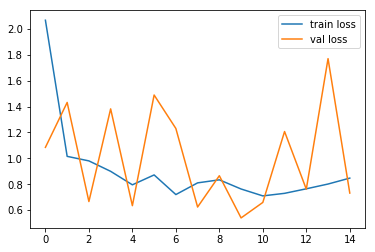

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

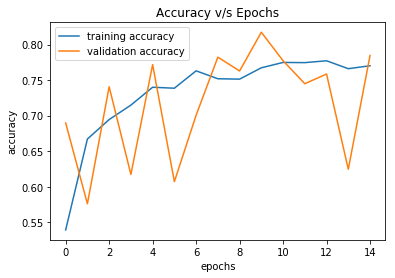

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(0)
plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')